Setup for Python

In [57]:
import random
import matplotlib.pyplot as plt

## Elevator Problem
This defines the elevator function, which uses the random library to tell us whether an elevator is coming up or going down. If we test this, we can see that the expected value is very close to the data given to us.

In [58]:
def elevator():
    if random.randrange(1,7) >= 1:
        return True
    else:
        return False

N = 100000
data = [elevator() for i in range(N)]
print("Expected value: ", 5/6)
print("Actual value: ", sum(data)/N)

Expected value:  0.8333333333333334
Actual value:  1.0


Now the question is, how do we calculate using two elevators? The problem tells us that the elevators are at a random point in their cycle, so we'll assign numbers to the floors both going up and going down so that we can keep track of where they are.

In [59]:
def elevator2():
    direction = random.randrange(0,2)
    floor = random.randrange(1,7)
    if direction == 0:
        return floor
    else:
        return -floor


def twoElevators():
    e1 = elevator2()
    e2 = elevator2()
    if e1 == 1 or e2 == 1 or e1 == 2 or e2 == 2:
        return False
    else:
        return True


N = 100000
data2 = [twoElevators() for i in range(N)]
print(sum(data2)/N)

0.69523


In [60]:
def threeElevators():
    e1 = elevator2()
    e2 = elevator2()
    e3 = elevator2()
    if e1 == 1 or e2 == 1 or e3 == 1 or e1 == 2 or e2 == 2 or e3 == 2:
        return False
    else:
        return True

N = 100000
data3 = [twoElevators() for i in range(N)]
print(sum(data3)/N)

0.69611


## The Forgetful Burglar

In this problem, I chose to store the locations visited in a list. If I was going to do this in another language, I might choose a different data structure, but this works well in Python.

We know that the burglar has an equal chance of moving backwards or forwards, and from each of those, the burglar has an equal chance of moving one or two spaces. I chose to select whether the burglar would move forwards or backwards first, then choose whether she would move one or two spaces in that direction (and as we know from statistics, 1/2 chance of moving left or right * 1/2 chance of moving one or two spaces = 1/4, which is correct because we know that there are 4 potential places for the burglar to go). I chose to do it this way because I realized it would be difficult to make randrange either a) select between -2 and 2 inclusive while excluding 0 or b) select between 4 consecutive numbers and decide when to add and when to subtract and by how much. Easier to just add an if/else and be done with it, especially since we aren't particularly attempting to conserve memory or space like we might do on firmware.

Mean =  3.8189
steps 	 probability
2 		 0.2571
3 		 0.2779
4 		 0.1998
5 		 0.1155
6 		 0.0632
7 		 0.0355


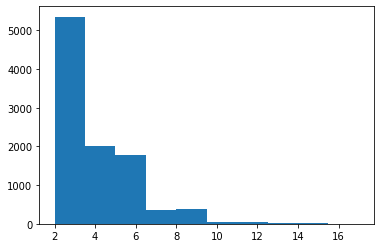

In [61]:
def experiment():
    location = 0
    visited = []
    moves = 0
    while location not in visited:
        visited.append(location)
        addorsub = random.randrange(0, 2)
        if addorsub == 0:
            location -= random.randrange(1,3)
        else:
            location += random.randrange(1,3)
        # spaces = random.range(1, 5)
        # if spaces < 3:
        #     location += spaces
        # elif spaces == 3:
        #     location -= 1
        # else:
        #     location -= 2
        moves += 1
    return moves

N = 10000
data4 = [experiment() for i in range(N)]
print("Mean = ", sum(data4)/N)

print("steps \t probability")
print(2, "\t\t", data4.count(2)/N)
print(3, "\t\t", data4.count(3)/N)
print(4, "\t\t", data4.count(4)/N)
print(5, "\t\t", data4.count(5)/N)
print(6, "\t\t", data4.count(6)/N)
print(7, "\t\t", data4.count(7)/N)

df = plt.hist(data4)

## Parrondo's Paradox

In [ ]:
def gameB(M):
    for i in range(100):
        if M % 3 == 0:
            if random.randrange(1,101)/100 <= .1 - 0.005:
                return True
            else:
                return False
        else:
            if random.randrange(1,101)/100 <= .75 - 0.005:
                return True
            else:
                return False

M = 100000
N = 10000
mArr = []
